## Machine Learning Project in Python on House Prices Data

This project is aimed at predicting residential prices in Ames,Iowa,USA

Processes taken throughout the project
1. Hypothesis Generation 
2. Reading Data 
3. Data Exploration 
4. Data Preprocessing 
5. Feature Engineering 
6. Modelling and Evaluation

### 1. Hypothesis Generation

Factors which can influence the house prices are

1. Area of House 
2. How old is the house
3. Location of the house
4. How close/far is the market
5. Connectivity of house location with transport
6. How many floors does the house have
7. What material is used in the construction
8. Water /Electricity availability
9. Play area / parks for kids (if any)
10. If terrace is available
11. If car parking is available
12. If security is available

### 2. Reading Data

In [1]:
#importing libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected = True)

In [2]:
train = pd.read_csv("train.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
#number of rows and columns in the train set

train.shape

(1460, 81)

In [4]:
#names of columns in the train set

train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
test = pd.read_csv("test.csv")
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [6]:
#number of rows and columns in the test set

train.shape

(1460, 81)

In [7]:
#names of columns in the test set

test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# checking for the number of rows with missing values in the train sets

train_nulls = train.shape[0] - train.dropna().shape[0]
train_nulls

1460

In [9]:
# checking for the number of rows with missing values in the test sets

test_null = test.shape[0] - test.dropna().shape[0]
test_null

1459

In [10]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [11]:
test.columns[test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

### 3. Data Exploration

Some of the processes used in the data exploration are:
1. Check for existence of missing values in columns and rows.
2. Check for distribution of target variable(whether it is skewed or not) which is "Sales Price in this case".
3. Sum of types of data in columns(numerical and categorical data types).
4. Finding the correlation behaviour of numeric variables in the numerical data types.

In [12]:
#1. Check for existence of missing values in columns and rows.

missing_values = train.isnull().sum() #/len(train)
missing_values = missing_values[missing_values > 0] # returns all missing values greater than 0
missing_values.sort_values() # sorts the values

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [13]:
#an interactive plot of the missing values using plotly

fig = px.histogram(x=missing_values.index, y=missing_values)
fig.update_xaxes(title="Names of columns with missing values")
fig.update_yaxes(title="Sum of missing values in each column")
fig.show()

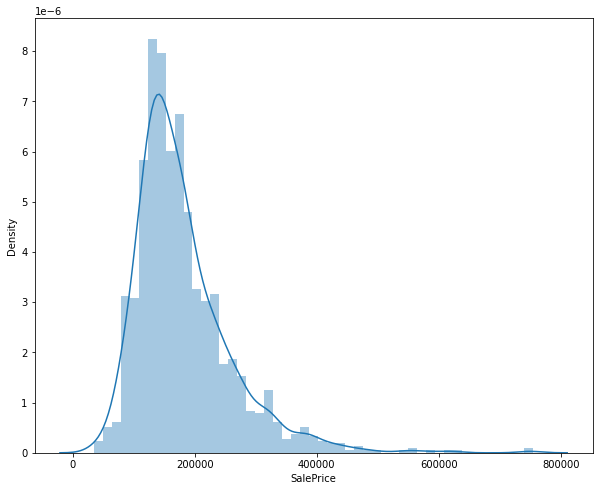

In [14]:
#2. Check for distribution of target variable(whether it is skewed or not) which is "Sales Price" in this case.

sns.distplot(train['SalePrice'])
plt.show()

It shows that it is right skewed and we can perform a log transform to get a normal distribution.
This is optional

In [15]:
#sum of types of data in columns(numerical and categorical data types).

numeric_data_types = train.select_dtypes(include=[np.number]).shape[1]
categorical_data_types = train.select_dtypes(exclude=[np.number]).shape[1]
print("Number of numeric data types are: ", numeric_data_types)
print("Number of categorical data types are: ", categorical_data_types)

Number of numeric data types are:  38
Number of categorical data types are:  43


##### Exploring numerical Features

<AxesSubplot:>

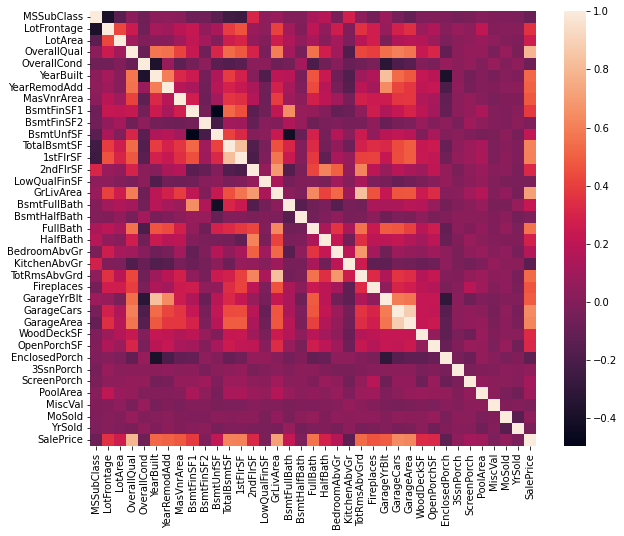

In [16]:
#finding the correlation behaviour of numeric variables in the numerical data types
# id() is a function in python, so it's recommend not to use a variable named id.
# we then have to remove id variable

corr_numeric_data = train.select_dtypes(include=[np.number])
del corr_numeric_data['Id']
corr = corr_numeric_data.corr()
sns.heatmap(corr)

In [17]:
corr_numeric_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
# We can tell that the columns "OverallQual" and " GrLivArea" are more correlated to "SalePrice"
# We go into indepth how correlated they are

#OverallQual vs SalePrice

overall_vs_sale = px.bar(train,x="OverallQual", y="SalePrice")
overall_vs_sale.show()


In [19]:
#GrlivArea vs SalePrice

gla_vs_sp = px.scatter(train, x='GrLivArea', y ='SalePrice', color='SalePrice')
gla_vs_sp.show()

##### in order to remove outliers we go back to the dataframe and select all grlivarea without the column and that will be our new dataframe

##### Exploring categorical Features

In [20]:
cat_data_type = train.select_dtypes(exclude=[np.number])
cat_data_type.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [21]:
grouped_cat = train.groupby(by = "SaleCondition").sum()
grouped_cat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SaleCondition,,,,,,,,,,,,,,,,,,,,,
Abnorml,74875,5825,5706.0,954531,563,544,197865,199432,7479.0,40613,...,7202,4464,4076,396,2031,1067,1020,653,202774,14799189
AdjLand,1801,280,218.0,32010,20,19,7780,7876,250.0,1257,...,0,151,0,0,0,0,0,25,8027,416500
Alloca,8265,850,648.0,137995,65,62,23615,23762,910.0,6608,...,1100,308,200,0,0,738,54,68,24098,2008529
Family,14958,1145,1320.0,192081,116,107,39242,39529,1770.0,8932,...,1617,497,448,0,153,0,0,128,40144,2992000
Normal,878889,68740,66429.0,12631087,7196,6780,2358899,2376475,115281.0,526484,...,114833,52351,27190,3934,18373,1743,62420,7465,2405461,209892259
Partial,87742,6230,9809.0,1406865,945,628,250650,250830,24861.0,63820,...,12845,10353,139,648,1432,480,0,891,250907,34036469


### 4. Data Preprocessing
1. We deal with outlier values
2. encode variables
3. Impute missung values
4. Delete columns and rows with missing values

In [22]:
#We deal with outlier values

train.drop(train[(train['GrLivArea']>4000)].index, inplace=True)
train.shape

(1456, 81)

In [23]:
#converting categorical values to dummy variables

In [24]:
cat_data_type.shape

(1460, 43)

### 5. Feature Engineering

In [25]:
train = pd.get_dummies(train, columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'], drop_first = True )
print(train.shape)
train.head()

(1456, 246)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [26]:
#dropping some columns from the train data as they are not found in test

train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=246)

In [27]:

train.shape

(1456, 246)

In [28]:
#input features

X = train.drop(columns = ['SalePrice'])
X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,0,1,0,0,0,1,0


In [29]:
# target variable

y = train['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1456, dtype: int64

### 6. Model Training and Evaluation

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPRegressor as MLP
from sklearn.linear_model import LinearRegression as LR, RidgeCV, LassoCV
from sklearn.ensemble import GradientBoostingRegressor as GBR
from lightgbm import LGBMRegressor as LGBM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import RandomForestRegressor as RF

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.model_selection import GridSearchCV


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)

In [35]:
model_LGBM = LGBM(random_state = 42, learning_rate = 0.01,  n_estimators=2000, \
             max_depth = -1, num_leaves=31).fit(X_train, y_train, eval_metric='mse',\
               eval_set=[(X_test,y_test),(X_train,y_train)], verbose=False)

y_predicted = model_LGBM.predict(X_test)
mse = MSE(y_test, y_predicted, squared = True)
rsquared = r2_score(y_test, y_predicted)
print("Recorded MSE is: ", mse)
print("Recorded r squared score is: ", rsquared)


Recorded MSE is:  541703948.8846867
Recorded r squared score is:  0.8967872005050846


### Training and Validation Curves

In [ ]:
LGBM.plot_metric(model_LGBM, ylabel ='mse')
plt.ylabel('mse')
plt.legend(['training','validation'])
plt.show()

### Feature importance
- Here, I visualise which of the features are the most important for the prediction of the Sale Price.

In [ ]:
LGBM.plot_importance(model_LGBM)